<a href="https://colab.research.google.com/github/oscarrhdatascience/visualitzacio_exploratoria/blob/main/Sprint4Tasca1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from datetime import datetime
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
%matplotlib inline
sns.set_context("talk")
sns.set(rc={'figure.figsize':(20,10)})
warnings.filterwarnings('ignore')

# Nivell1

## Exercici 1
Resumeix gràficament el data set [DelayedFlights.csv](https://www.kaggle.com/giovamata/airlinedelaycauses)

Crea almenys una visualització per:

* Una variable categòrica (UniqueCarrier)
* Una variable numèrica (ArrDelay)
* Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
* Dues variables numèriques (ArrDelay i DepDelay)
* Tres variables (ArrDelay, DepDelay i UniqueCarrier)
* Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

Specifying the directory where we are working on

In [3]:
os.chdir("/content/drive/MyDrive/Data_Science_amb_Python/Sprint04-Visualitzacio_de_les_dades/S04-T01-Visualitzacio_grafica_dun_dataset/visualitzacio_exploratoria/") 

Showing the first 5 rows of our dataframe

In [4]:
df = pd.read_csv("./DelayedFlights.csv", index_col=0)
df.dropna(inplace=True)
df['AverageSpeed'] = df['Distance'] / (df['AirTime'] / 60)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AverageSpeed
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,401.298701
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,415.043478
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,464.299065
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,419.436620
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,457.090909


Showing the type of each column so we can see which are categoricals and which are numericals (integers or floats)

In [5]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
AverageSpeed         float64
dtype: object

Defining on metadata the atributes of each column

In [6]:
df.attrs = {"Year":"year of the flight (stored as factor)",
            "Month":"month of the flight (stored as factor).", 
            "DayofMonth":"day of the month (1 to 31) (stored as integer).", 
            "DayOfWeek":"day of the week (stored as factor).", 
            "DepTime":"actual departure time (stored as integer).", 
            "CRSDepTime":"scheduled departure time (stored as integer).",
            "ArrTime":"actual arrival time (stored as integer).", 
            "CRSArrTime":"scheduled arrival time (stored as integer).", 
            "UniqueCarrier":"carrier ID (stored as factor).", 
            "FlightNum":"flight number (stored as factor).", 
            "TailNum":"plane's tail number (stored as factor)",
            "ActualElapsedTime":"actual elapsed time of the flight, in minutes (stored as integer).", 
            "CRSElapsedTime":"scheduled elapsed time of the flight, in minutes (stored as integer)", 
            "AirTime":"airborne time for the flight, in minutes (stored as integer).", 
            "ArrDelay":"arrival delay, in minutes (stored as integer).",
            "DepDelay":"departure delay, in minutes (stored as integer).", 
            "Origin":"originating airport (stored as factor).", 
            "Dest":"destination airport (stored as factor).", 
            "Distance":"flight distance (stored as integer).", 
            "TaxiIn":"taxi time from wheels down to arrival at the gate, in minutes (stored as integer).", 
            "TaxiOut":"taxi time from departure from the gate to wheels up, in minutes (stored as integer).",
            "Cancelled":"cancellation status (stored as logical).", 
            "CancellationCode":"cancellation code, if applicable (stored as factor).", 
            "Diverted":"diversion status (stored as logical).", 
            "CarrierDelay":"delay, in minutes, attributable to the carrier (stored as integer).",
            "WeatherDelay":"delay, in minutes, attributable to weather factors (stored as integer).", 
            "NASDelay":"delay, in minutes, attributable to the National Aviation System (stored as integer).", 
            "SecurityDelay":"delay, in minutes, attributable to security factors (stored as integer).", 
            "LateAircraftDelay":"delay, in minutes, attributable to late-arriving aircraft (stored as integer).",
            "AverageSpeed":"average speed in miles per hour (stored as float)."}

### Una variable categòrica (UniqueCarrier)

Making a count of each Carrier that is in our dataframe

In [7]:
pd.DataFrame(df['UniqueCarrier'].value_counts()).T

,WN,AA,MQ,UA,OO,DL,XE,US,CO,EV,NW,YV,FL,OH,B6,9E,AS,F9,HA,AQ
UniqueCarrier,203559,132257,97555,95465,88991,72252,72008,59508,58958,56781,54744,50646,46991,39292,38232,35630,24012,15940,4325,340


Plotting on a pie plot the percentage of num of flights for each carrier

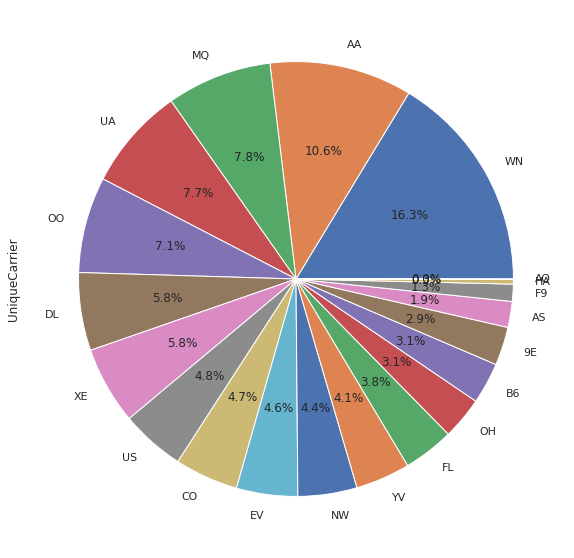

In [8]:
plot = df['UniqueCarrier'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Plotting on a histogram the num of flights for each carrier

Text(0.5, 1.0, 'UniqueCarrier histogram')

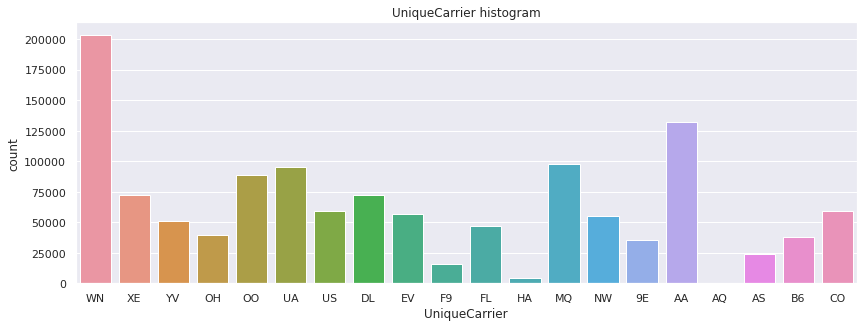

In [9]:
plt.figure(figsize=(14,4.8))
plot2 = sns.countplot(data=df, x="UniqueCarrier")
plt.title("UniqueCarrier histogram")

### Una variable numèrica (ArrDelay) + extra: Comparació entre els diferents tipus de Delays






Plotting the distribution of the Arrival delayed flights

(0.0, 400.0)

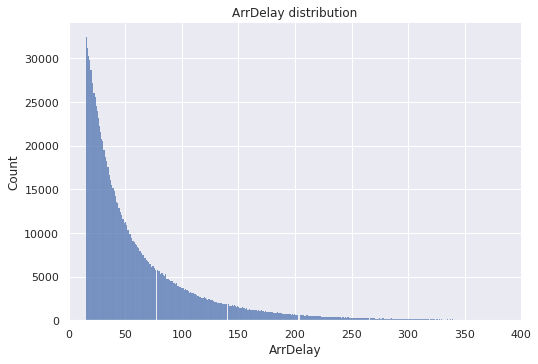

In [10]:
plot3 = sns.displot(data=df, x="ArrDelay", aspect=1.5)
plt.title("ArrDelay distribution")
plt.xlim(0, 400)

Plotting the different types of Delay on the same graphic so we can compare them

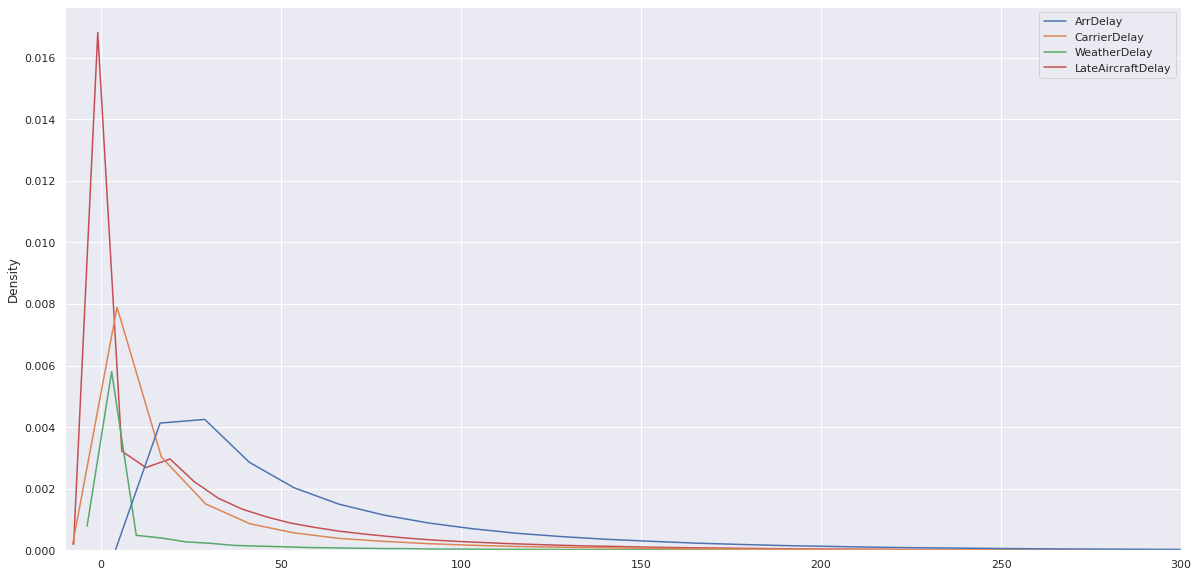

In [11]:
plot11, ax = plt.subplots()
sns.kdeplot(data = df[['ArrDelay', 'CarrierDelay','WeatherDelay','LateAircraftDelay']], ax = ax)
ax.set_xlim(-10,300)
sns.set(rc={'figure.figsize':(10,6)})

Plotting the correlation of the different types of delays and also the AirTime and Distance.

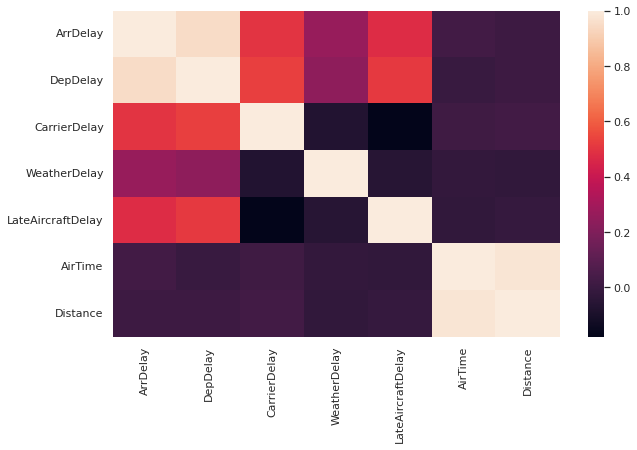

In [13]:
plt.figure(figsize=(10,6))
plot12 = sns.heatmap(df[['ArrDelay', 'DepDelay', 'CarrierDelay','WeatherDelay','LateAircraftDelay', 'AirTime', 'Distance']].corr())

### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

Plotting the Arrival Delay by Carriers so we can compare to each other.

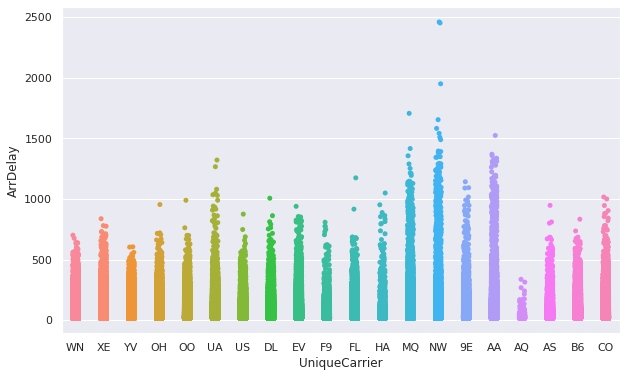

In [14]:
plt.figure(figsize=(10,6))
tips = sns.load_dataset("tips")
plot5 = sns.stripplot(x=df['UniqueCarrier'], y=df['ArrDelay'], data=tips)

Plotting a boxplot of the Arrival Delay by Carriers so we can see that between the first quartile and the third they remain close to 0

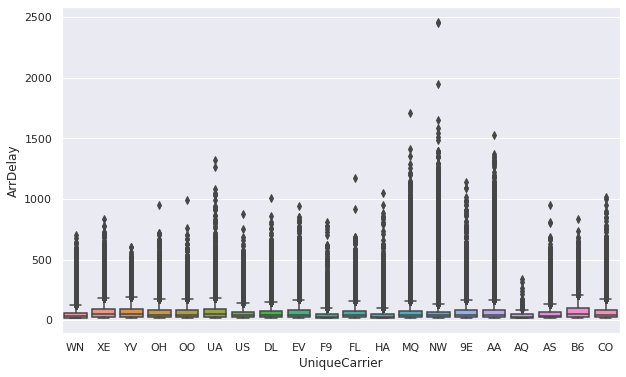

In [15]:
plt.figure(figsize=(10,6))
plot6 = sns.boxplot(x='UniqueCarrier',y='ArrDelay',data=df)

### Dues variables numèriques (ArrDelay i DepDelay)

Plotting an scatterplot of the Arrival Delay related to the Departure Delay, we can see that they are strongly correlated with some exceptions.

Text(0.5, 1.0, 'ArrDelay related to DepDelay')

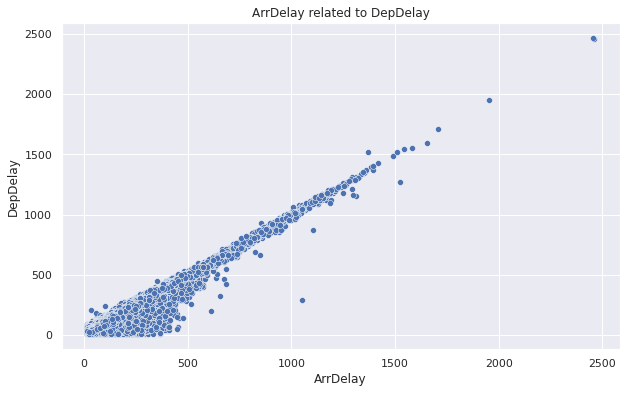

In [16]:
plt.figure(figsize=(10,6))
plot7 = sns.scatterplot(x="ArrDelay",y="DepDelay",data=df)
plt.title("ArrDelay related to DepDelay")

This plot is very similar to the previous one but we can better apreciate the correlation between Arrival Delays and Departure Delays

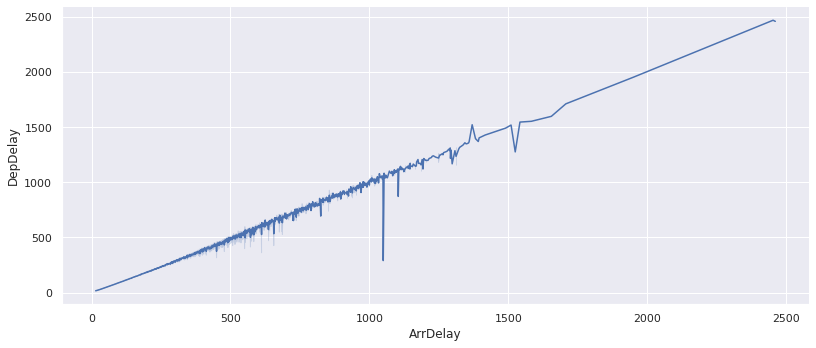

In [17]:
plot8 = sns.relplot(x="ArrDelay", y="DepDelay", kind="line", data=df, aspect=2.3)

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

We are plotting the same previous scatterplot but this time we use the hue to see also which Carrier the flights are from 

Text(0.5, 1.0, 'ArrDelay related to DepDelay by Carriers')

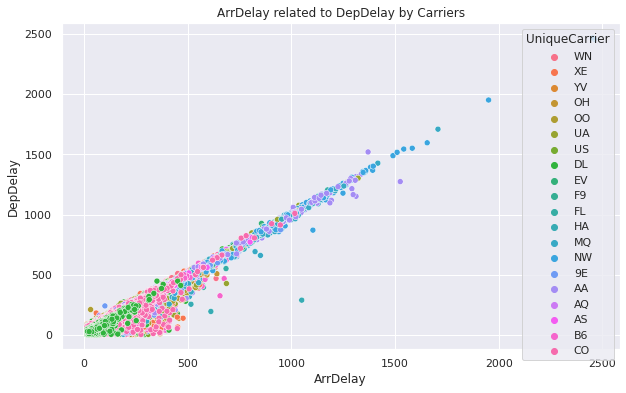

In [18]:
plt.figure(figsize=(10,6))
plot9 = sns.scatterplot(x="ArrDelay",y="DepDelay",data=df,hue="UniqueCarrier")
plt.title("ArrDelay related to DepDelay by Carriers")

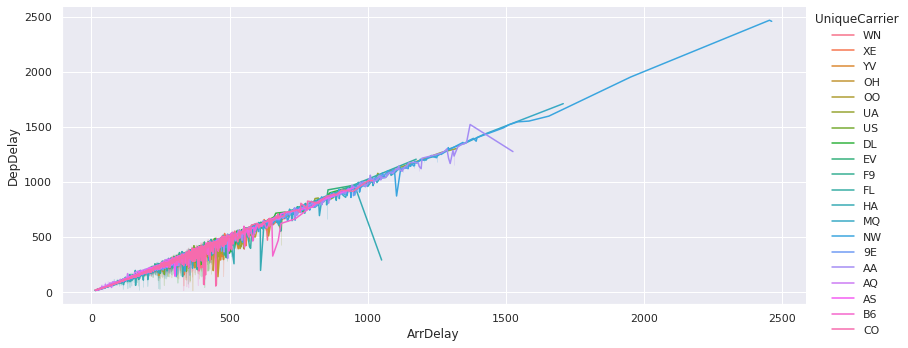

In [19]:
plot10 = sns.relplot(x="ArrDelay", y="DepDelay", hue="UniqueCarrier", kind="line", data=df, aspect=2.3)

### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

In this exercise we made a 3d plot so can have 3 axis, I have to say that this was not my idea originally but I saw the notebook from a classmate and I thought this is the best option to really apreciate every axis.

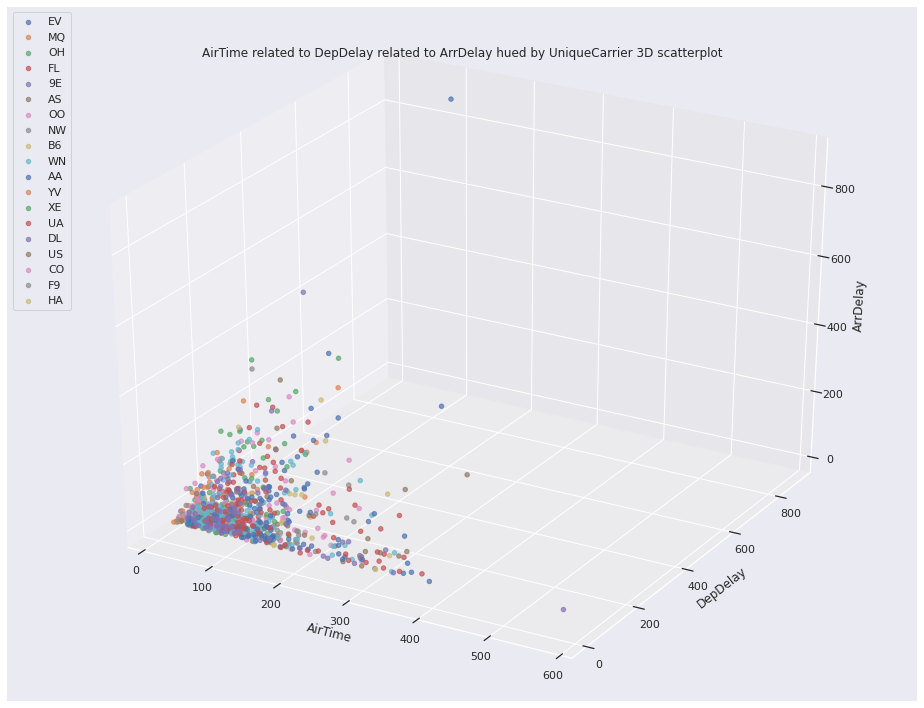

In [20]:
df_s =df.sample(n=1000, random_state=1)
plt.rcParams["figure.figsize"] = [13, 10]
plt.rcParams["figure.autolayout"] = True

x = "AirTime"
y = "DepDelay"
z = "ArrDelay"

fig = plt.figure()
ax = fig.gca(projection='3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
for s in df_s.UniqueCarrier.unique():
    ax.scatter(df_s.AirTime[df_s.UniqueCarrier==s], 
               df_s.DepDelay[df_s.UniqueCarrier==s], 
               df_s.ArrDelay[df_s.UniqueCarrier==s], 
               label=s, 
               alpha=.7)
ax.set(xlabel='AirTime', ylabel='DepDelay', zlabel='ArrDelay', title="AirTime related to DepDelay related to ArrDelay hued by UniqueCarrier 3D scatterplot")
plt.legend(loc='upper left')

In [21]:
def animate(frame):
  ax.view_init(elev=30, azim=frame)
  plt.pause(.001)
  return fig
  
anim = animation.FuncAnimation(fig, animate, frames=360, interval=50)
HTML(anim.to_html5_video())

## Exercici 2

Exporta els gràfics com imatges o com html.

In [26]:
plot.get_figure().savefig('pieplot_UniqueCarrier.png')
plot2.get_figure().savefig('barplot_UniqueCarrier.png')
plot3.savefig("displot_ArrDelay.png")
plot5.get_figure().savefig('stripplot_ArrDelay_UniqueCarrier.png')
plot6.get_figure().savefig('boxplot_ArrDelay_UniqueCarrier.png')
plot7.get_figure().savefig('scatterplot_ArrDelay_DepDelay.png')
plot8.savefig('relplot_ArrDelay_DepDelay.png')
plot9.get_figure().savefig('scatterplot_ArrDelay_DepDelay_UniqueCarrier.png')
plot10.savefig('relplot_ArrDelay_DepDelay_UniqueCarrier.png')
plot11.savefig('kdeplot_Diff_Delays.png')
plot12.get_figure().savefig('heatmap_correlation.png')
ax.get_figure().savefig('3dplot_ArrDelay_DepDelay_AirTime_UniqueCarrier.png')

## Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.

https://github.com/oscarrhdatascience/visualitzacio_exploratoria/blob/main/Sprint3Tasca5_modificat.ipynb